# Example(Cross-Validation for Wine)

In [17]:
#Validation Data is a subset of original data -> only for testing not for training
#5-4 validation: 5 different validation sets -> 5 trees for depth 1 calaulate avg validation error, 
                                               #5 trees for depth 2 calaulate avg validation error,...
                                               #5 trees for depth 5 calaulate avg validation error->select the best fitted one
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import graphviz

In [18]:
df = pd.read_csv('Data/Wine/Wine_red.csv', sep=';')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [19]:
df['rating'] = pd.qcut(df.quality , q=2, labels = ['bad','good']) #for continuous
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad


In [20]:
attributes = df.drop(['quality','rating'], axis = 1) #rating if from quality
target = df.rating

In [21]:
Tree = tree.DecisionTreeClassifier()

In [22]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [23]:
TreeCV = GridSearchCV(Tree, param_grid = parameters, n_jobs=-1) #n_jobs->courses number I take -> on gauss

In [24]:
TreeCV.fit(attributes,target) #50 trees

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [25]:
TreeCV.best_params_

{'max_depth': 2}

In [26]:
#TreeCV.predict(validation set)

In [27]:
#want to see how they vary -> learning curves
results = pd.DataFrame()
results['depth'] = parameters['max_depth']
results['valid error'] = 1 - TreeCV.cv_results_['mean_test_score']
results.head()

,depth,valid error
0,1,0.135709
1,2,0.119446
2,3,0.130725
3,4,0.145092
4,5,0.151975


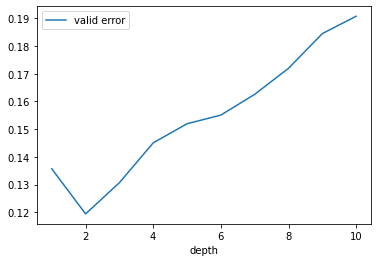

In [28]:
results.plot.line(x = 'depth' , y = 'valid error')

In [29]:
ix = results['valid error'].idxmin() #deoth 2 tree has minimum error
results.iloc[ix]

depth          2.000000
valid error    0.119446
Name: 1, dtype: float64

In [30]:
#create new tree with depth=2
Tree = tree.DecisionTreeClassifier(max_depth = 2)
Tree.fit(attributes,target)

DecisionTreeClassifier(max_depth=2)

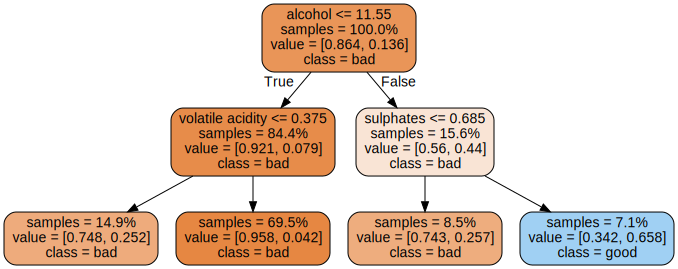

In [31]:
dot_data = tree.export_graphviz(Tree,
                               out_file=None,
                               feature_names=attributes.columns,
                               class_names = ['bad','good'],
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph.render('RedWine')
graph
#most bottles are bad

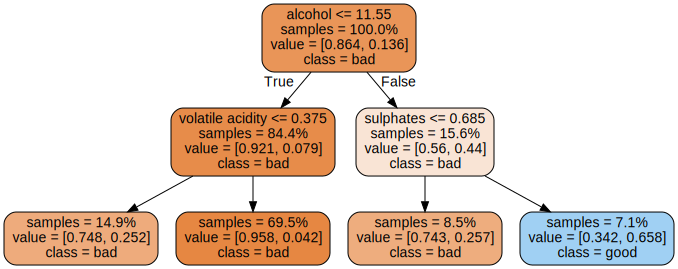

In [32]:
#use this can skip step 25 and 26
dot_data = tree.export_graphviz(TreeCV.best_estimator_,
                               out_file=None,
                               feature_names=attributes.columns,
                               class_names = ['bad','good'],
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph.render('RedWine')
graph
#most bottles are bad